In [1]:
import numpy as np
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense, Conv2D, Flatten, Reshape, Conv2DTranspose
from keras.layers import LeakyReLU, Dropout
import matplotlib.pyplot as plt
from keras.utils import plot_model
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.applications.vgg16 import preprocess_input

Using TensorFlow backend.
C:\Users\aboubakiri.diaw\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\aboubakiri.diaw\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\aboubakiri.diaw\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\aboubakiri.diaw\Anaconda3\lib\site-packag

tf.__version__ is 1.14.0
tf.keras.__version__ is: 2.2.4-tf


In [2]:
# define the discriminator model
def define_D(in_shape=(128,128,3)):
    model = Sequential()
    model.add(Conv2D(64, (3,3), padding='same', input_shape=in_shape))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

In [3]:
# define the generator model
def define_G(latent_dim):
    model = Sequential()
	  # foundation for 16x16 image
    n_nodes = 256 * 16 * 16
    model.add(Dense(n_nodes, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((16, 16, 256)))
    # upsample to 32x32
    model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    # upsample to 64x64
    model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    # upsamplde to 128x128
    model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Conv2D(3, (7,7), activation='tanh', padding='same'))
    return model

In [4]:
# define the combined generator and discriminator model, for updating the generator
def define_GAN(model_G, model_D):
	# make weights in the discriminator not trainable
	model_D.trainable = False
	model = Sequential()
	model.add(model_G)
	model.add(model_D)
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt)
	return model

In [5]:
#train_batches = ImageDataGenerator(rescale=1./255).flow_from_directory(directory='C:/Users/aboubakiri.diaw/deploiement recomm/Datasets/train', target_size=(224,224), classes=['Faces', 'Pantographes', 'Toiture'], batch_size=10)

In [6]:
datagen = ImageDataGenerator(rescale=1./255)
print(datagen)
X = datagen.flow_from_directory('C:/Users/aboubakiri.diaw/deploiement recomm/Datasets/train',
                                    target_size= (128,128),
                                    batch_size=155,
                                    classes=['neymar'])
print(X.batch_index)
X.next()

Found 300 images belonging to 1 classes.
0


(array([[[[0.8235295 , 0.85098046, 0.7803922 ],
          [0.8235295 , 0.85098046, 0.7803922 ],
          [0.8196079 , 0.83921576, 0.7607844 ],
          ...,
          [0.8941177 , 0.81568635, 0.37647063],
          [0.9058824 , 0.80392164, 0.37254903],
          [0.9058824 , 0.80392164, 0.37254903]],
 
         [[0.8235295 , 0.85098046, 0.7803922 ],
          [0.8235295 , 0.85098046, 0.7803922 ],
          [0.8196079 , 0.83921576, 0.7607844 ],
          ...,
          [0.8941177 , 0.81568635, 0.37647063],
          [0.9058824 , 0.80392164, 0.37254903],
          [0.9058824 , 0.80392164, 0.37254903]],
 
         [[0.8196079 , 0.83921576, 0.7607844 ],
          [0.8196079 , 0.83921576, 0.7607844 ],
          [0.8117648 , 0.8313726 , 0.74509805],
          ...,
          [0.8941177 , 0.8078432 , 0.36862746],
          [0.909804  , 0.80392164, 0.36078432],
          [0.909804  , 0.80392164, 0.36078432]],
 
         ...,
 
         [[0.73333335, 0.86274517, 0.8196079 ],
          [0.73333

In [7]:
def load_real_images():
    datagen = ImageDataGenerator(rescale=1./255)
    X = datagen.flow_from_directory('C:/Users/aboubakiri.diaw/deploiement recomm/Datasets/train',
                                    target_size= (128,128),
                                    batch_size=155,
                                    classes=['neymar'])
    data_list = []
    batch_index = 0
    while batch_index <= X.batch_index:
        data = X.next()
        data_list.append(data[0])
        batch_index += 1
    img_array = np.asarray(data_list)
    return img_array

In [8]:
def generate_real_images(dataset, n_samples):
    i = np.random.randint(0, dataset.shape[0], n_samples)
    X = dataset[i]
    y = np.ones((n_samples,1))
    return X, y

In [9]:
def generate_latent_points(latent_dim, n_samples):
    X = np.random.randn(latent_dim * n_samples)
    X = X.reshape(n_samples, latent_dim)
    return X

In [10]:
def generate_fake_images(model_G, latent_dim, n_samples):
    X_input = generate_latent_points(latent_dim, n_samples)
    X = model_G.predict(X_input)
    y = np.zeros((n_samples, 1))
    return X, y

In [11]:
def summarize_performance(epoch, model_G, model_D, dataset, latent_dim, n_samples=200):
    
    model_G.save('C:/Users/aboubakiri.diaw/deploiement recomm/Datasets/train/modele_neymar_save.h5' +str(epoch)+ '.h5')
    X_real, y_real = generate_real_images(dataset, n_samples)
    acc_real = model_D.evaluate(X_real, y_real, verbose=0)
    x_fake, y_fake = generate_fake_images(model_G, latent_dim, n_samples)
    acc_fake = model_D.evaluate(x_fake, y_fake, verbose=0)
    print(acc_real)
    print('Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real[0]*100, acc_fake[0]*100))

In [12]:
def train_discriminator(model, dataset, n_iter=100, n_batch=256):
    half_batch = int(n_batch/2)
    # manually enumerate epochs
    for i in range(n_iter):
        X_real, y_real = generate_real_images(dataset, half_batch)
        real_acc = model.train_on_batch(X_real, y_real)
        X_fake, y_fake = generate_fake_images(half_batch)
        fake_acc = model.train_on_batch(X_fake, y_fake)
        print('%d real=%.0f%% fake=%.0f%%' % (i+1, real_acc*100, fake_acc*100))

In [13]:
def train_GAN(model_G, model_D, model_GAN, dataset, latent_dim, n_epochs=5000, n_batch=128):
	bat_per_epo = int(dataset.shape[0] / n_batch)
	half_batch = int(n_batch / 2)
	# manually enumerate epochs
	for i in range(n_epochs):
		# enumerate batches over the training set
		for j in range(bat_per_epo):
			X_real, y_real = generate_real_images(dataset, half_batch)
			X_fake, y_fake = generate_fake_images(model_G, latent_dim, half_batch)
			X, y = np.vstack((X_real, X_fake)), np.vstack((y_real, y_fake))
			d_loss, _ = model_D.train_on_batch(X, y)
			X_gan = generate_latent_points(latent_dim, n_batch)
			y_gan = np.ones((n_batch, 1))
			g_loss = model_GAN.train_on_batch(X_gan, y_gan)
			print('%d, %d/%d, d=%.3f, g=%.3f' % (i+1, j+1, bat_per_epo, d_loss, g_loss))
		# evaluate the model performance
		if (i+1) % 2500 == 0:
			summarize_performance(i, model_G, model_D, dataset, latent_dim)

In [14]:
dataset=load_real_images()
dataset

Found 300 images belonging to 1 classes.


array([array([[[[0.95294124, 0.9803922 , 1.        ],
         [0.95294124, 0.9803922 , 1.        ],
         [0.9450981 , 0.9607844 , 0.9725491 ],
         ...,
         [0.854902  , 0.86274517, 0.8431373 ],
         [0.9333334 , 0.9490197 , 0.9450981 ],
         [0.9333334 , 0.9490197 , 0.9450981 ]],

        [[0.95294124, 0.9803922 , 1.        ],
         [0.95294124, 0.9803922 , 1.        ],
         [0.9450981 , 0.9607844 , 0.9725491 ],
         ...,
         [0.854902  , 0.86274517, 0.8431373 ],
         [0.9333334 , 0.9490197 , 0.9450981 ],
         [0.9333334 , 0.9490197 , 0.9450981 ]],

        [[0.9450981 , 0.9803922 , 1.        ],
         [0.9450981 , 0.9803922 , 1.        ],
         [0.94117653, 0.9607844 , 0.9725491 ],
         ...,
         [0.7607844 , 0.7725491 , 0.74509805],
         [0.9294118 , 0.96470594, 0.95294124],
         [0.9294118 , 0.96470594, 0.95294124]],

        ...,

        [[0.9568628 , 0.97647065, 0.98823535],
         [0.9568628 , 0.97647065, 0.98

In [15]:
dataset.shape

(2,)

In [16]:
latent_dim =100
model_D = define_D()
model_G = define_G(latent_dim)
model_GAN = define_GAN(model_G, model_D)
dataset=load_real_images()
train_GAN(model_G, model_D,model_GAN,dataset[0], latent_dim)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Found 300 images belonging to 1 classes.



C:\Users\aboubakiri.diaw\Anaconda3\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


1, 1/1, d=0.703, g=0.693


C:\Users\aboubakiri.diaw\Anaconda3\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


2, 1/1, d=0.674, g=0.692
3, 1/1, d=0.640, g=0.690
4, 1/1, d=0.606, g=0.685
5, 1/1, d=0.571, g=0.671
6, 1/1, d=0.542, g=0.638
7, 1/1, d=0.515, g=0.566
8, 1/1, d=0.577, g=0.461
9, 1/1, d=0.751, g=0.389
10, 1/1, d=0.902, g=0.380
11, 1/1, d=0.919, g=0.434
12, 1/1, d=0.830, g=0.537
13, 1/1, d=0.755, g=0.654
14, 1/1, d=0.700, g=0.756
15, 1/1, d=0.669, g=0.864
16, 1/1, d=0.645, g=1.000
17, 1/1, d=0.634, g=1.135
18, 1/1, d=0.628, g=1.183
19, 1/1, d=0.652, g=1.091
20, 1/1, d=0.696, g=0.903
21, 1/1, d=0.725, g=0.776
22, 1/1, d=0.731, g=0.715
23, 1/1, d=0.714, g=0.692
24, 1/1, d=0.687, g=0.679
25, 1/1, d=0.662, g=0.668
26, 1/1, d=0.638, g=0.652
27, 1/1, d=0.616, g=0.632
28, 1/1, d=0.605, g=0.607
29, 1/1, d=0.620, g=0.609
30, 1/1, d=0.637, g=0.666
31, 1/1, d=0.654, g=0.726
32, 1/1, d=0.687, g=0.763
33, 1/1, d=0.701, g=0.724
34, 1/1, d=0.724, g=0.701
35, 1/1, d=0.716, g=0.681
36, 1/1, d=0.685, g=0.665
37, 1/1, d=0.660, g=0.656
38, 1/1, d=0.638, g=0.656
39, 1/1, d=0.617, g=0.666
40, 1/1, d=0.602, g=

In [ ]:
model = load_model('C:/Users/aboubakiri.diaw/deploiement recomm/Datasets/train/modele_savedog.h5')

Error: Kernel is dead

In [ ]:
def generate_latent_points(latent_dim, n_samples):
	# generate points in the latent space
	x_input = np.random.randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	z_input = x_input.reshape(n_samples, latent_dim)
	return z_input

In [ ]:
def plot_images(images, n):
	# scales image values in the range of [0,1]
	images = (images-images.min())/(images.max() - images.min())
	for i in range(n):
		# define subplot
		plt.subplot(1, n, 1 + i)
		# turn off axis
		plt.axis('off')
		# plot raw pixel data
		plt.imshow(images[i, :, :])
	plt.show()

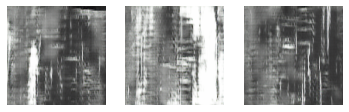

In [ ]:
pts = generate_latent_points(100, 30)
# generate images
X = model.predict(pts)
# plot the result
plot_images(X, 3)